# Numerical Methods for Differential Equations

## Problem Statement

A certain cold soda initially at 38°F would warm up to 44°F in 24 minutes while sitting in a room of temperature 68°F.  
Suppose a similar cold soda initially at 38°F is left outside on a couple ideal March days, 
when the high temperature of 60°F is reached at 6pm and the low temperature of 40°F is reached at 6am.  

If the soda was left out at 4pm, how warm will the soda be the next day at 8pm?

## Solution

### Cooling Model

We'll model the change in temperature of our soda using Newton's law of cooling, which says that the change in temperature is proportional to the difference in temperature of the object and its surroundings.

If $T$ is the temperature in Fahrenheit after $t$ hours, then:
$$\frac{dT}{dt} = k(T_{soda}-T_{surroundings})$$
where $k$ is a proportionality constant.

Since we have initial conditions for the first cold soda, we can use those to find $k$:
$$\frac{dT}{dt} = k(T-68)$$
where $T$ is the teperature of the soda (and it's in a 68F room).

### Solving for T and k

Since the ODE is separable, we can solve for $T$ by integrating:
$$\int \frac{1}{T-68}dT = \int kdt$$ 
$$ln|T-68|+c = kt+c$$
Solving for T and absorbing the constants:
$$T = ce^{kt}+68$$

The problem gives us two initial conditions: $T(0) = 38$ and $T(\frac{2}{5}) = 44$.  Where did the $\frac{2}{5}$ come from?  Shouldn't it be 24?  Remember that we said $t$ is measured in hours and 24 minutes is $\frac{2}{5}$ of an hour.
$T(0) = 38$:
$$38 = ce^{0k}+68 \implies c+30=0 \implies c=-30$$
$T(\frac{2}{5}) = 44$:
$$ 44 = -30e^{\frac{2}{5}k}+68 $$ 
$$-24 = -30e^{\frac{2}{5}k}$$
$$ 4 = 5e^{\frac{2}{5}k} $$
$$ ln(\frac{4}{5}) = \frac{2}{5}k $$
$$ k = \frac{2ln\left(\frac{4}{5}\right)}{5} $$

Now that we have a proportionality constant, $k$, we can update our original model:
$$\frac{dT}{dt} = \frac{2}{5}ln\left(\frac{4}{5}\right)(T_{soda}-T_{surroundings})$$

### Modeling the change in outdoor temperature

Since we are outdoors, the surrounding temperature, $T_{surroundings}$, fluctuates.  We can use a function of $t$ to model the outside temperature>  Since we know the time and value of the extrema, we can use a smooth sine curve that oscillates between them.  Specifically, we want a sine about 50F with an amplitude of 10F and a period of 24 hours.  The soda was left outside at 4pm, so we'll set $t=0=$4pm, so that $t$ is the number of hours that have passed since the soda was left outside.
$$ T_{surroundings}(t) = 10sin(\frac{\pi}{12}(t+4))+50 $$

### Final Equation

$$\frac{dT}{dt} = \frac{2}{5}ln\left(\frac{4}{5}\right)\left[T-10sin(\frac{\pi}{12}(t+4))+50\right]$$

This is a first-order ordinary differential equation.  It isn't separable, and the sine function makes it non-linear as well, so we're going to use numerical estimation methods for integration to solve it.


## Coding the Equation

Here we just define the DE as a python function of the temperature and time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ODE
k = 5 * np.log(4.0/5.0) / 2.0 # proportionality constant
start_temp = 38.0 # initial temperature of soda
total_hours = 28.0 # 4pm to 8pm next day

def env_temp(t): # outside temperature at (t+4)%12 o'clock ... t=0 is at 4:00pm when the soda is initially left out
    return 10 * np.sin((np.pi / 12) * (t + 4)) + 50

def d_T(t, T): # change in temperature of soda, T at (t+4)%12 o'clock
    return k * (T - env_temp(t))

## Direction Field Plot

Here we plot the direction field of the equation.

/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:698: RuntimeWarning: divide by zero encountered in true_divide
  shrink = length / minsh
/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:699: RuntimeWarning: invalid value encountered in multiply
  X0 = shrink * X0[np.newaxis, :]
/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:700: RuntimeWarning: invalid value encountered in multiply
  Y0 = shrink * Y0[np.newaxis, :]


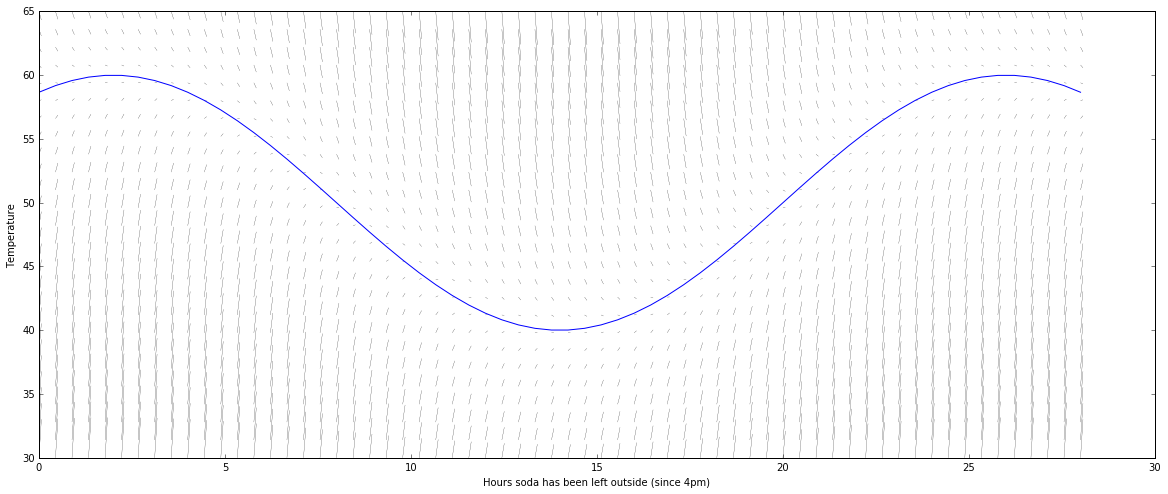

In [3]:
# Grid
yx_ratio = 2.0 / 5.0 # ratio between number of graphed points on each axis and length of each axis plot
x_steps = 64 # number of points in time to plot
y_steps = np.around(x_steps * yx_ratio).astype(int) # number of temperature points to plot
x = np.linspace(0.0,total_hours,num=x_steps) # time points
y = np.linspace(30.0,65.0,num=y_steps) # temperature points
X, Y = np.meshgrid(x,y)

# Arrow Vectors
U = np.ones((x_steps, y_steps)) # x component
V = d_T(X, Y) # y component (slope, T')

# Plot
figsize = 20
plt.figure(figsize=(figsize, figsize*yx_ratio))
plt.quiver(X, Y, U, V, width = 0.00001*figsize, headwidth=1, headlength=0) # plot slope field
plt.plot(x, env_temp(x)) # plot outside temperature curve
plt.xlabel('Hours soda has been left outside (since 4pm)')
plt.ylabel('Temperature')

The blue curve is the outside temperature.

## Using improved Euler's method to solve the equation

In [15]:
# Implementation of Improved Euler's Method
def improved_euler(steps): # Passing d_T as a paramter could make this problem-independent
    T = np.zeros(steps+1)
    x = np.linspace(0.0,total_hours,num=steps+1) # t values for each step
    delta_t = 1.0 / ((steps) / total_hours) # 1/steps per hour
    T[0] = start_temp    
    for i in range(steps):
        m0 = d_T(x[i], T[i]) # slope at T_i
        T_i1 = T[i] + (m0 * delta_t) # T_i+1 calculated using Euler's method
        m1 = d_T(x[i+1], T_i1) # slope at T_i+1
        m = (m0 + m1) / 2.0 # average of slopes
        T[i+1] = T[i] + (m * delta_t) # numerical estimate for T_i+1
        #print("step: {0}, temp: {1}".format(i, T[i]))
    return T

iterations = int(60 * total_hours)
print("T({0}): {1}".format(total_hours, runga_kutta(iterations)[-1]))

T(28.0): 59.02015311707901


We get an estimate of around 59F by calculating d_T at each minute.  By trying again with more iterations, we can get a rough estimate of accuracy through the number of decimal places the runs agree on.

In [16]:
iterations = int(60 * total_hours * 100)
print("T({0}): {1}".format(total_hours, runga_kutta(iterations)[-1]))

T(28.0): 59.02015311721398


Our first four decimal places still agree.

## Solving with 4th-order Runga-Kutta

In [20]:
# Implementation of 4th-order Runga-Kutta

def runga_kutta(steps): # Passing d_T as a paramter could make this problem-independent
    T = np.zeros(steps+1)
    x = np.linspace(0.0,total_hours,num=steps+1) # t values for each step
    delta_t = 1.0 / ((steps) / total_hours) # 1/steps per hour
    T[0] = start_temp    
    for i in range(steps):
        m1 = d_T(x[i], T[i]) # slope at T_i
        m2 = d_T(x[i] + (delta_t/2), T[i] + (m1 * delta_t / 2)) # midpoint slope estimate
        m3 = d_T(x[i] + (delta_t/2), T[i] + (m2 * delta_t / 2)) # midpoint slope estimate based on m2
        m4 = d_T(x[i+1], T[i] + (m3 * delta_t)) # slope at T_i+1 based on m3
        T[i+1] = T[i] + (delta_t/6) * (m1 + 2*m2 + 2*m3 + m4) # numerical estimate for T_i+1
        #print("step: {0}, temp: {1}".format(i, T[i]))
    return T
    
iterations = int(60 * total_hours)
print("T({0})_1: {1}".format(total_hours, runga_kutta(iterations)[-1]))

iterations = int(60 * total_hours * 100)
print("T({0})_2: {1}".format(total_hours, runga_kutta(iterations)[-1]))

T(28.0)_1: 59.02015311707901
T(28.0)_2: 59.02015311721398


### Plotting the solution curve

Now that we can estimate solutions numerically, we can plot the temperature of the soda over time.

/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:698: RuntimeWarning: divide by zero encountered in true_divide
  shrink = length / minsh
/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:699: RuntimeWarning: invalid value encountered in multiply
  X0 = shrink * X0[np.newaxis, :]
/home/polyarch/.local/lib/python3.4/site-packages/matplotlib/quiver.py:700: RuntimeWarning: invalid value encountered in multiply
  Y0 = shrink * Y0[np.newaxis, :]


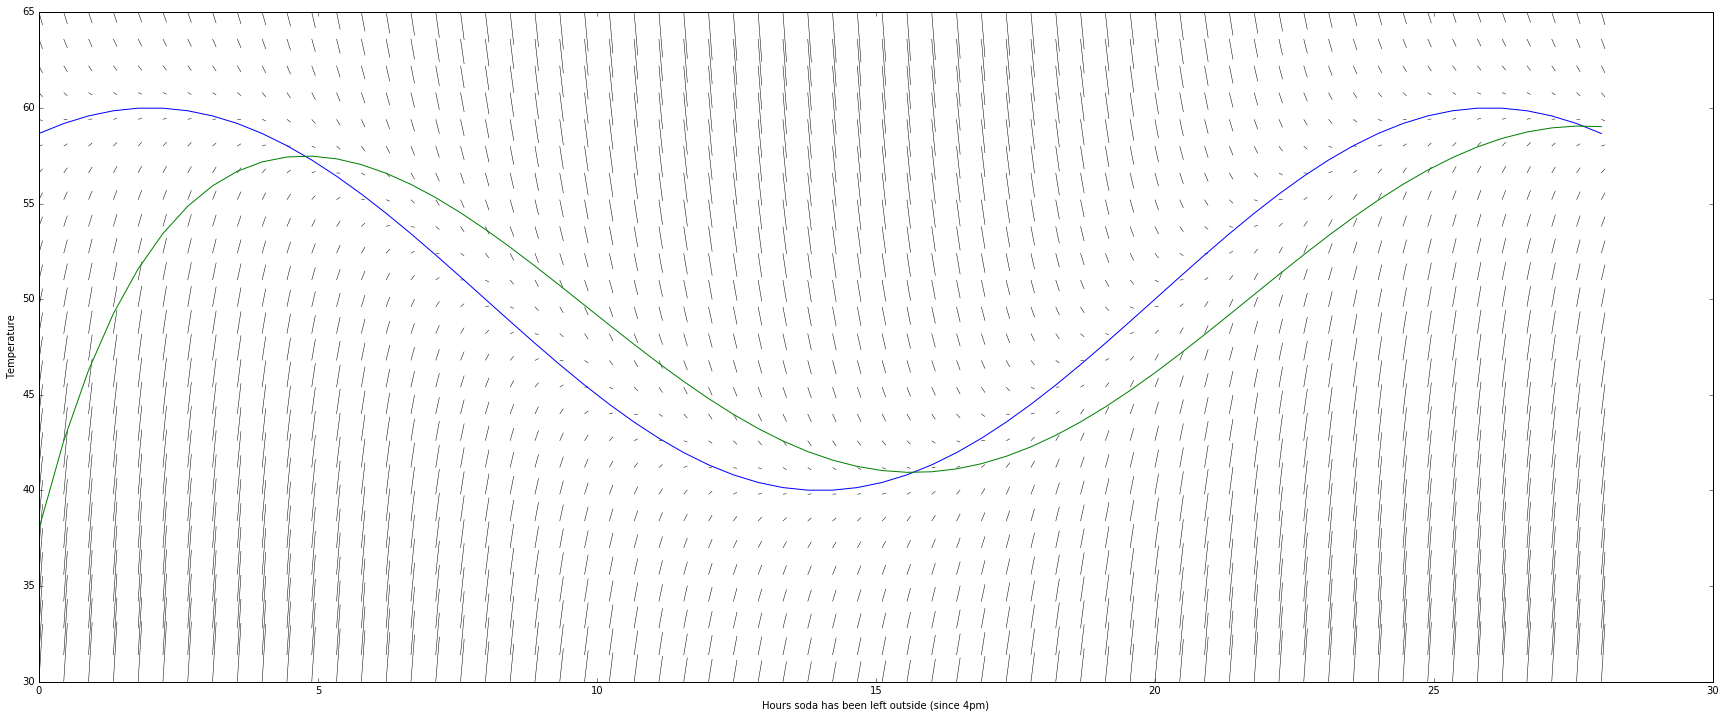

In [19]:
#Solution
T = runga_kutta(x_steps-1)

# Plot
plt.figure(figsize=(figsize, figsize*yx_ratio))
plt.quiver(X, Y, U, V, width = 0.00001*figsize, headwidth=1, headlength=0) # plot slope field
plt.plot(x, env_temp(x)) # plot outside temperature curve
plt.plot(x, T) # plot solution curve
plt.xlabel('Hours soda has been left outside (since 4pm)')
plt.ylabel('Temperature')